# Based on Issue #31: Add cost and time estimates as well
We want to add simple cost and time estimates to assess the broader impacts of programs.
We will do so by creating simple distance-based maps for each metric - e.g.

cost_per_mile = { "drove_alone": ..., "shared_ride": ...., "pilot_ebike": ....
}

We can then compute the overall impact of the metric by pseudo code similar to:

for trip in trips:
    cost_impact_trip = (cost_per_mile[“ebike”] – cost_per_mile[trip.replaced_mode]) * trip.length_in_miles
    cost_impact_trips.append(cost_impact_trip)

cost_impact_overall = sum(cost_impact_trips)

Of course, we could also use pandas if that works better - e.g. something like:

cost_impact_trips = trips.apply(lambda trip_row: (cost_per_mile["ebike"] - cost_per_mile[trip_row.replaced_mode]) * trip_row.length__in_miles
cost_impact_overall = cost_impact_trips.sum()


Shankari K. suggested following the process outlined in the energy_calculations notebook reproduced below.

In [12]:
# user defined modules
import scaffolding
from plots import *

# external packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [9]:
# global configurations
sns.set_style('whitegrid')
sns.set()

%matplotlib inline

In [16]:
# external variables (run mapping_dictionaries notebook before running this cell)
%store -r df_EI  
%store -r df_C

%store -r dic_re
%store -r dic_pur
%store -r dic_fuel

# convert a dictionary to a defaultdict
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_re = defaultdict(lambda: 'Other',dic_re)

In [7]:
# Scaffolding Inputs (None -> get all data)
year = None
month = None
program = None

In [19]:
# Define time series for year and month
tq = scaffolding.get_time_query(year, month)

In [20]:
# Acquire rows from database corresponding to time series and program label
participant_ct_df = scaffolding.load_all_participant_trips(program, tq)

[UUID('576e37c7-ab7e-4c03-add7-02486bc3f42e'),
 UUID('8b563348-52b3-4e3e-b046-a0aaf4fcea15'),
 UUID('5079bb93-c9cf-46d7-a643-dfc86bb05605'),
 UUID('feabfccd-dd6c-4e8e-8517-9d7177042483'),
 UUID('113aef67-400e-4e21-a29f-d04e50fc42ea'),
 UUID('c8b9fe22-86f8-449a-b64f-c18a8d20eefc'),
 UUID('e7b24d99-324d-4d6d-b247-9edc87d3c848'),
 UUID('1044195f-af9e-43d4-9407-60594e5e9938'),
 UUID('898b1a5e-cdd4-4a0c-90e4-942fa298e456'),
 UUID('1d292b85-c549-409a-a10d-746e957582a0'),
 UUID('cb3222a7-1e72-4a92-8b7b-2c4795402497'),
 UUID('efdbea3b-eef6-48fc-9558-7585f4ad6f24'),
 UUID('960835ac-9d8a-421d-8b8a-bf816f8a4b92')]

Loaded all confirmed trips of length 3492


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


After filtering, found 3492 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


In [22]:
# Remove any labelled trips from the dataframe
labeled_ct = scaffolding.filter_labeled_trips(participant_ct_df)

After filtering, found 2425 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,11,2,17,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,11,5,12,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,11,5,12,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,11,5,12,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,11,5,13,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09


In [28]:
# Just expand the user_input feature to multiple features for each entry
expanded_ct = scaffolding.expand_userinputs(labeled_ct)

,mode_confirm,purpose_confirm,replaced_mode
0,walk,meal,same_mode
1,train,personal_med,same_mode
2,skateboard,transit_transfer,bus
3,not_a_trip,transit_transfer,same_mode
4,not_a_trip,transit_transfer,same_mode


After expanding, columns went from 33 -> 36


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
0,DwellSegmentationTimeFilter,1.604364e+09,2020-11-02T17:45:22.115000-07:00,"{'type': 'Point', 'coordinates': [-104.9409405...",5fa139609ae96f3a5fcdef31,1.604364e+09,2020-11-02T17:39:08.049000-07:00,"{'type': 'Point', 'coordinates': [-104.9398732...",374.066000,384.730231,...,45,22,0,America/Denver,600533265e173ffb99e07625,1d292b85-c549-409a-a10d-746e957582a0,1.604402e+09,walk,meal,same_mode
1,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:12:12-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",5fa4690763a5e0e8d90c7fa4,1.604601e+09,2020-11-05T11:30:56.952000-07:00,"{'type': 'Point', 'coordinates': [-104.9479963...",2475.048000,13765.915676,...,12,12,3,America/Denver,600533265e173ffb99e07626,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,train,personal_med,same_mode
2,DwellSegmentationTimeFilter,1.604604e+09,2020-11-05T12:27:22-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",5fa4690763a5e0e8d90c7fa8,1.604604e+09,2020-11-05T12:22:21.130739-07:00,"{'type': 'Point', 'coordinates': [-105.0670666...",300.869261,1508.223413,...,27,22,3,America/Denver,600533265e173ffb99e07627,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,skateboard,transit_transfer,bus
3,DwellSegmentationTimeFilter,1.604606e+09,2020-11-05T12:47:29.017000-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",5fa4690763a5e0e8d90c7faa,1.604605e+09,2020-11-05T12:42:19.793043-07:00,"{'type': 'Point', 'coordinates': [-105.080878,...",309.223957,434.038504,...,47,29,3,America/Denver,600533265e173ffb99e07628,1d292b85-c549-409a-a10d-746e957582a0,1.604610e+09,not_a_trip,transit_transfer,same_mode
4,DwellSegmentationTimeFilter,1.604610e+09,2020-11-05T13:54:28.880000-07:00,"{'type': 'Point', 'coordinates': [-105.0824703...",5fa4771a533f6ebf89c7c5e3,1.604610e+09,2020-11-05T13:52:57.667396-07:00,"{'type': 'Point', 'coordinates': [-105.0827029...",91.212605,333.230154,...,54,28,3,America/Denver,600533265e173ffb99e07629,1d292b85-c549-409a-a10d-746e957582a0,1.604614e+09,not_a_trip,transit_transfer,same_mode


In [31]:
# Removes some rows that don't show a change from another mode to pilot e-bike + name same_mode as confirmed_mode
expanded_ct = scaffolding.data_quality_check(expanded_ct)
expanded_ct.shape

(2374, 36)

In [35]:
## Mapping new labels with dictionaries
expanded_ct['Trip_purpose']= expanded_ct['purpose_confirm'].map(dic_pur)
expanded_ct['Mode_confirm']= expanded_ct['mode_confirm'].map(dic_re)
expanded_ct['Replaced_mode']= expanded_ct['replaced_mode'].map(dic_re)

#Mapping fuel
expanded_ct['Mode_confirm_fuel']= expanded_ct['Mode_confirm'].map(dic_fuel)
expanded_ct['Replaced_mode_fuel']= expanded_ct['Replaced_mode'].map(dic_fuel)
expanded_ct.shape

(2374, 41)

In [36]:
# Just a meters to miles conversion at this point
scaffolding.unit_conversions(expanded_ct)

In [37]:
file_suffix = scaffolding.get_file_suffix(year, month, program)
quality_text = scaffolding.get_quality_text(participant_ct_df, expanded_ct)


Based on 2374 confirmed trips from 12 users
of 3492 total trips from 13 users (67.98%)


### This is where I need to make changes to include the cost and time impact...

In [38]:
expanded_ct = scaffolding.energy_intensity(expanded_ct, df_EI, 'distance','Replaced_mode', 'Mode_confirm')
expanded_ct = scaffolding.energy_impact_kWH(expanded_ct, 'distance_miles','Replaced_mode', 'Mode_confirm')

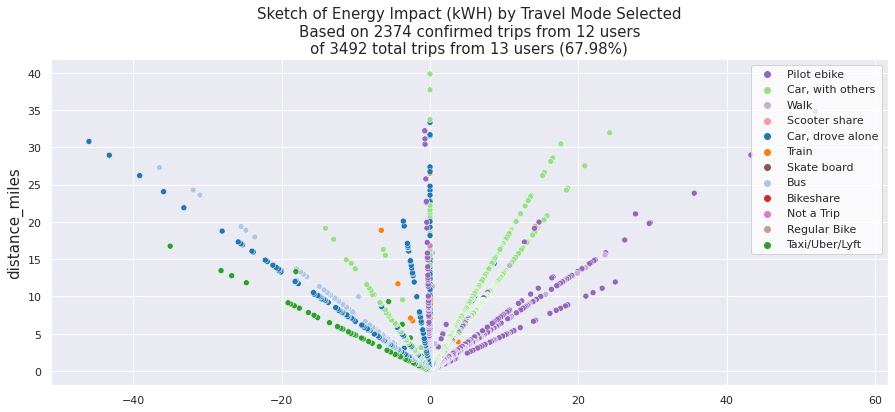

In [39]:
data=expanded_ct.loc[(expanded_ct['distance_miles'] <= 40)].sort_values(by=['Energy_Impact(kWH)'], ascending=False)   
x='Energy_Impact(kWH)'
y='distance_miles'
legend ='Mode_confirm'
plot_title="Sketch of Energy Impact (kWH) by Travel Mode Selected\n%s" % quality_text
file_name ='sketch_distance_energy_impact%s.png' % file_suffix
distancevsenergy(data,x,y,legend,plot_title,file_name)